<h1> EDA Sales Analysis</h1>

<h3> Import Library </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


<h3> load dataset </h3>

In [2]:
data = pd.read_csv("D:\.vscode\kodingan\EDA-Sales-Analysis\Data\supermarket_sales - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


<h3> Checking Missing Values </h3>
<h3> mengecek missing values</h3> 

In [5]:
miss_val = data.isnull().sum()
miss_val

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

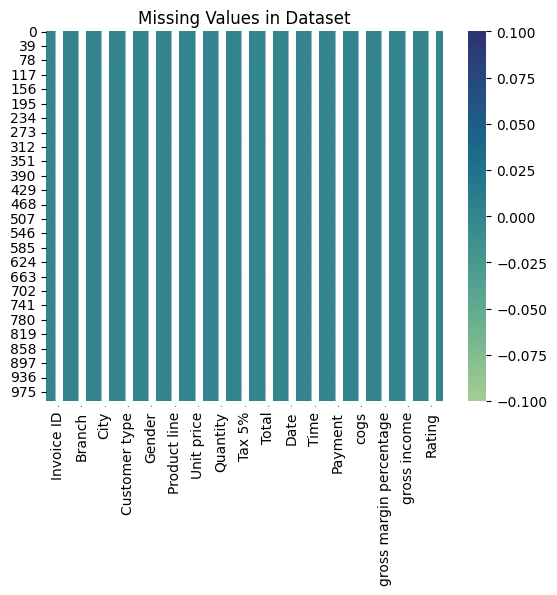

In [9]:
sns.heatmap(data.isnull(), annot=True, cmap='crest')
plt.title('Missing Values in Dataset')
plt.show()

We can see that the data set has no missing values or null data <br>
Kita bisa lihat bahwa datanya tidak mempunyai missing values atau data null.

<h3> Analisis Outliers (Outlier Detection) </h3>

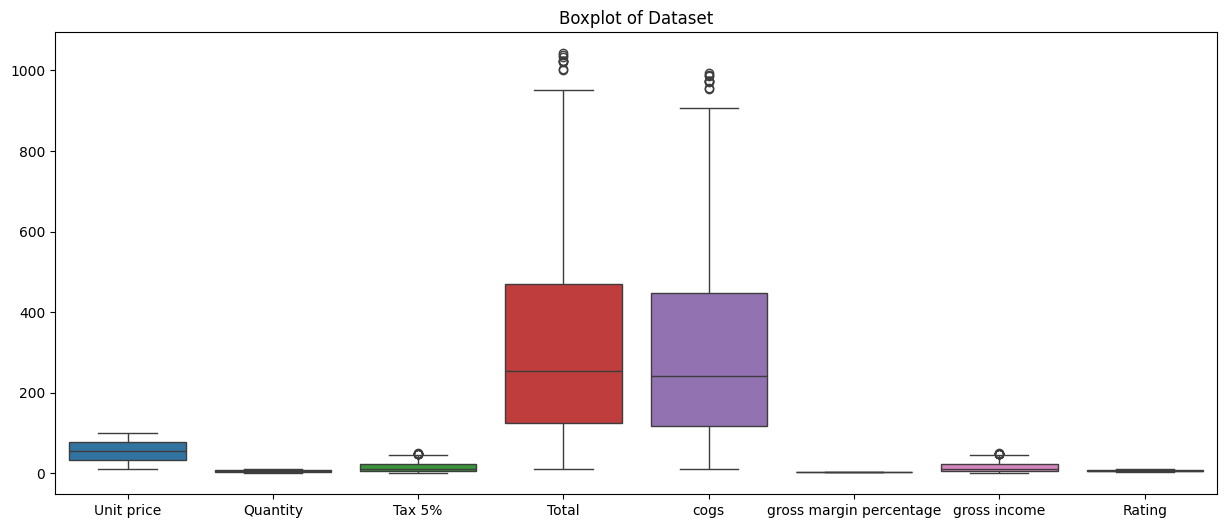

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data)
plt.title('Boxplot of Dataset')
plt.show()

In [15]:
from scipy import stats

data['Z-score'] = stats.zscore(data['Total'])
outliers = data[data['Z-score'].abs() > 3]
print(outliers)

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating, Z-score]
Index: []


After analyzing the boxplot, we can see that there are no outliers.<br>
setelah menganalisa boxplot dan z-score, kita bisa melihat bahwa tidak ada outlier

<h3> Segmentasi Pelanggan Berdasarkan Gender dan Pembelian </h3>
<h3> Customers Segmentation Based From Gender and Price Range </h3>

In [23]:
data['Customer type','unit price'] = pd.cut(data['Total'], bins=[0,100,500,1000, float('inf')], 
                                         labels=['Very Low', 'Low', 'Medium', 'High'])

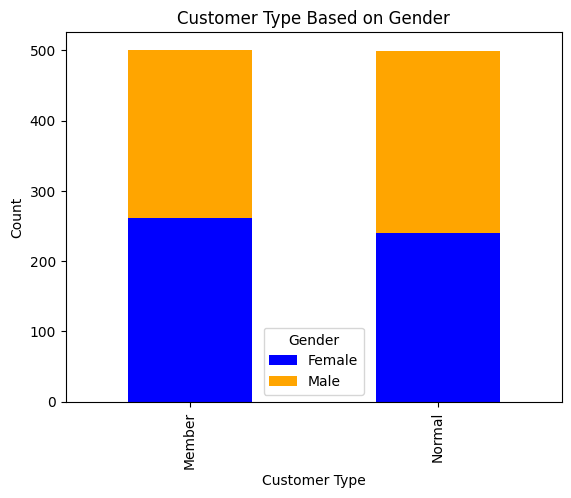

In [24]:
counts = data.groupby(['Customer type', 'Gender']).size().unstack()
counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Customer Type Based on Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

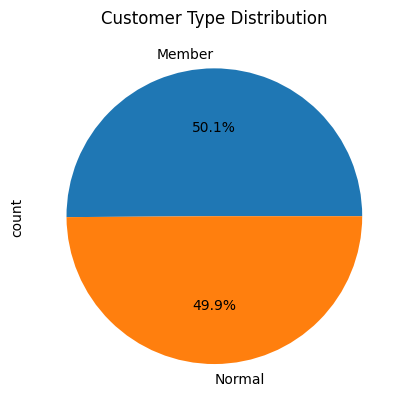

In [25]:
data['Customer type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.show()

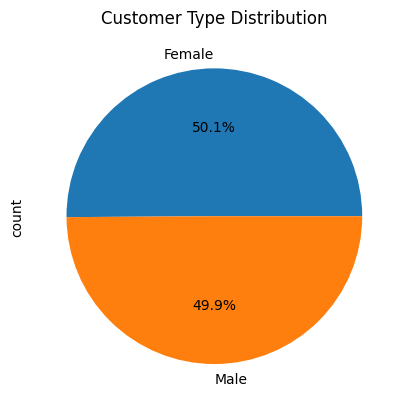

In [32]:
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Type Distribution')
plt.show()

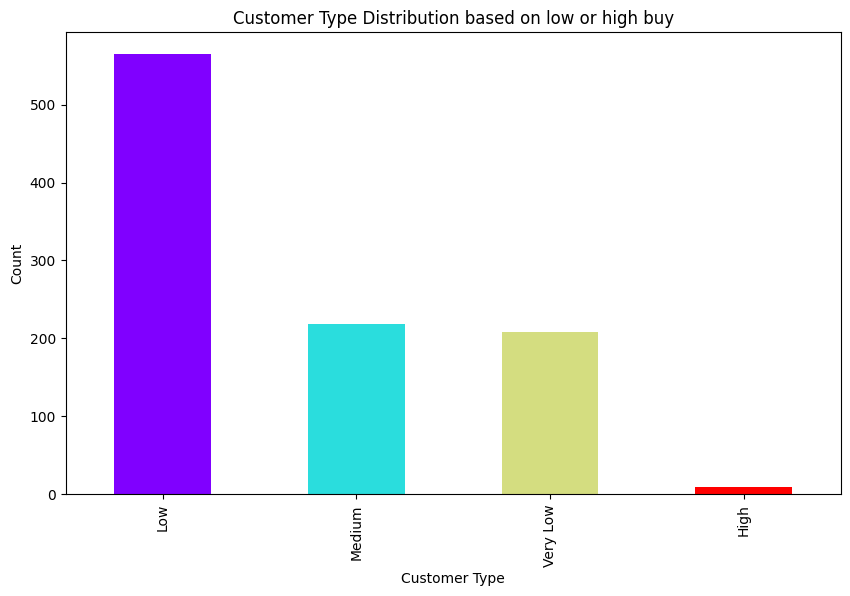

In [48]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(data['Customer type','Gender'].value_counts())))
data['Customer type','Gender'].value_counts().plot(kind='bar', color= colors, figsize=(10, 6))
plt.title('Customer Type Distribution based on low or high buy')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

As we can see that there is a lot of custamers who do low buy, and more that 50% of them are members and also female.
<br> 
seperti yang bisa kita lihat bahwa banyak kustomer yang melakukan low buy atau mempunyai kemampuan untuk melakukan low buy. dan <b>lebih dari 50% kustomer tersebut adalah member dan wanita<b>

<h3> Menghitung Total Penjualan untuk Setiap Product </h3>
<h3> Counting Total Sales for Each Product </h3>

In [34]:
product_sales = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)
product_sales

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

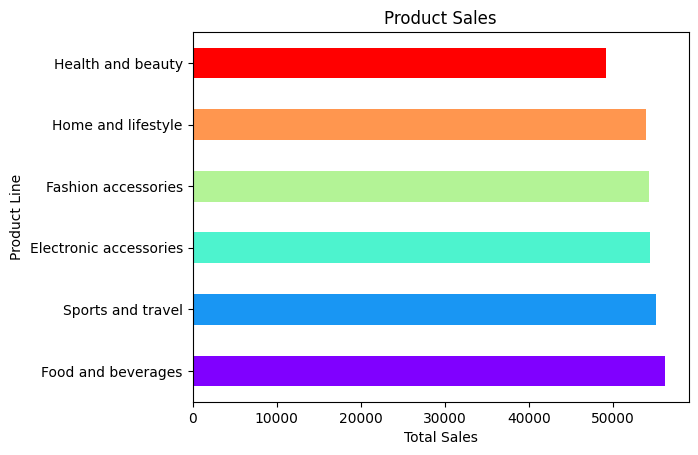

In [ ]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(product_sales)))
product_sales.plot(kind='barh', color=colors)
plt.title('Product Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

As we can see that the top selling product is food and beverages. this happend probably because of the living needs or basic needs of the customers. <br>

Seperti yang bisa kita lihat, top selling product adalah makanan dan minuman. ini terjadi karena kebutuhan hidup atau kebutuhan dasar kustomer

<h3>Analisa Harga Product</h3>
<h3>Product Price Analysis</h3>

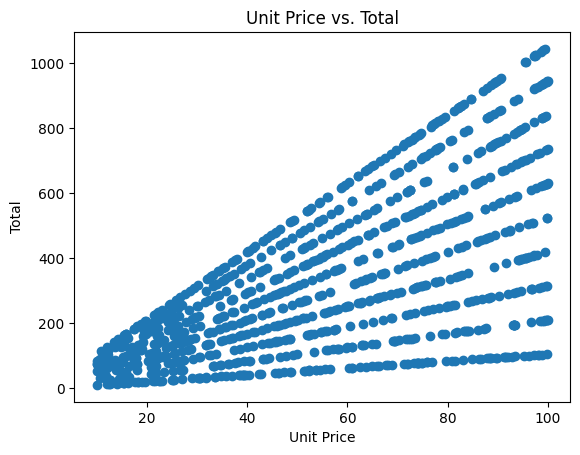

In [53]:
plt.scatter(x='Unit price', y='Total', data=data)
plt.title('Unit Price vs. Total')
plt.xlabel('Unit Price')
plt.ylabel('Total')
plt.show()